In [1]:
!pip install thundersvm-cuda10 # for cuda10
#!pip install thundersvm # for cuda9


In [0]:
from thundersvm import SVC

In [3]:
# Also run the function plot_confusion_matrix defined in the last cell of this notebook
import time
import numpy as np
from keras.datasets import cifar10

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.utils.multiclass import unique_labels

Using TensorFlow backend.


In [0]:
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

xTrain = xTrain[0:100].astype(np.float) # For testing the model I took only 100 samples.
yTrain = np.squeeze(yTrain[0:100])

xTest = xTest[0:100].astype(np.float)
yTest = np.squeeze(yTest[0:100])

xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xTest = np.reshape(xTest, (xTest.shape[0], -1))

#Normalize 
xTrain=((xTrain/255)*2)-1 
xTest=((xTest/255)*2)-1 

In [5]:
param = [{"kernel": ["rbf"],"C": [1, 10, 100],"gamma": [1e-2, 1e-3]},{"kernel": ["polynomial"],"C": [0.1, 1, 10, 100],"degree": [2, 3, 4]}]
svm = SVC(probability=True)
svm_gpu = GridSearchCV(svm, param, cv=5,n_jobs=1, verbose=3) # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
svm_gpu.fit(xTrain, yTrain)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.200, total=   2.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.150, total=   1.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.150, total=   1.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.150, total=   1.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.150, total=   1.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.300, total=   1.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.150, total=   1.7s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.250, total=   1.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.200, total=   1.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, cache_size=None, class_weight=None, coef0=0.0,
                           decision_function_shape='ovo', degree=3,
                           gamma='auto', gpu_id=0, kernel='rbf', max_iter=-1,
                           max_mem_size=-1, n_jobs=-1, probability=True,
                           random_state=None, shrinking=False, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                          'kernel': ['polynomial']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [6]:
print(svm_gpu.best_params_) # prints the best combination of parameters
print(sorted(svm_gpu.cv_results_.keys())) 

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_degree', 'param_gamma', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


In [8]:
y_predict=svm_gpu.predict(xTrain)
print("Trainin_Accuracy =",(yTrain==y_predict).mean())

y_predict=svm_gpu.predict(xTest)
print("Testing_Accuracy =",(yTest==y_predict).mean())

Trainin_Accuracy = 0.42
Testing_Accuracy = 0.09


Confusion matrix, without normalization


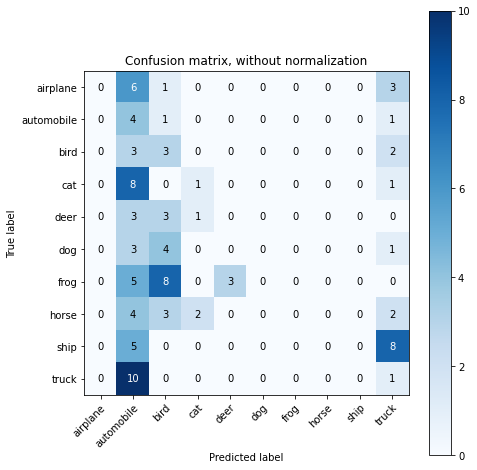

In [10]:
label_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plot_confusion_matrix(yTest, y_predict, classes = label_names) 

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

